In [2]:
'''
Para usar o jupyternotebook voce deve instalar as seguintes bibliotecas

!pip install pandas
!pip install plotly
!pip install ipywidgets
!pip install matplotlib
!pip install seaborn
!pip install openpyxl

No seu terminal, instale e atualize os seguites pacotes para nao termos problemas com a nbformat

pip install ipykernel
pip install nbformat --upgrade
pip3 install ipykernel
pip3 install --upgrade nbformat

(so consegui resolvendo assim)

Apos isso reinicialize seu kernel para as alteracoes funcionarem

'''


import pandas as pd
import plotly.express as px #plotar histogramas e boxplots
import ipywidgets as widgets    #display interativo
from IPython.display import display #display interativo
import matplotlib.pyplot as plt #manipular e plotas dataframe
import seaborn as sns #histograma
import plotly.graph_objects as go
import plotly.io as pio #salvar como html


In [21]:
#variaveis nominais

def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df.fillna('Sem_Info')
    #comentar a variavel debaixo (df) para entrar com o seu database
    df=df[['UF_COLETA','Regiao']]
    return df

def plot_histogram(df, column):
    bins = sorted(df[column].unique())
    fig = px.histogram(df, x=column, nbins=30, title=f'Histograma da coluna {column}') #acho q se tirar os valores e colocar as legendas ja de uma vez, posso usar só essa linha e ignorar as demais
    colors = px.colors.qualitative.Plotly
    fig.update_traces(marker_color=colors)
    pio.write_html(fig, f'histograma_{column}.html')
    fig.show()

def main():
    file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
    sheet_name = 'Respostas_ao_formulario_CONGELA'
    df = load_data(file_path, sheet_name)
    dropdown = widgets.Dropdown(options=df.columns,description='Coluna:',disabled=False,)
    display(dropdown)
    button = widgets.Button(description="Gerar Histograma")

    def on_button_clicked(b):
        column = dropdown.value
        plot_histogram(df, column)
    button.on_click(on_button_clicked)
    display(button)

if __name__ == "__main__":
    main()

Dropdown(description='Coluna:', options=('UF_COLETA', 'Regiao'), value='UF_COLETA')

Button(description='Gerar Histograma', style=ButtonStyle())

In [22]:
#variaveis numéricas

def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    df = df.fillna(-1)
    #comentar a variavel debaixo (df) para entrar com o seu database
    df=df[['Codigo_classes_de_coleta', 'Classificacao_Covid','Vacina_contra_Covid_antes_da_doenca',
       'Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021',
       'GENERO', 'IDADE_anos', 'SE_ESTA_GESTANTE', 'ESCOLARIDADE', 'TABAGISMO',
       'TIPO_SANGUINEO', 'FATOR_Rh', 'N_I_Para_Comorbidades',
       'Sem_comorbidades', 'Cardiopatias_Hipertensao', 'Diabetes_Obesidade',
       'Doenca_autoimune', 'Pneumopatias', 'Outras_comorbidades',
       'MEDICACAO_CRONICA', 'SE_SIM_QUAL_MEDICACAO', 'Hospitalizacao', 'UTI',
       'SE_HOUVE_SUPORTE_VENTILATORIO', 'HOUVE_TRATAMENTO_MEDICAMENTOSO',
       'RESULTADO_RT_PCR', 'CRITERIO_DE_diagnostico', 'EVOLUCAO_DESFECHO',
       'Retirar_por_parentesco_NATORA']]
    return df

def plot_histogram(df, column):
    bins = sorted(df[column].unique())
    fig = px.histogram(df, x=column, title=f'Histograma da coluna {column}', histfunc='count',
                   labels={'count': 'Porcentagem'}, category_orders={'x': bins},
                   barmode='overlay', opacity=0.75)
    colors = px.colors.qualitative.Plotly
    fig.update_traces(marker_color=colors)
    fig.update_xaxes(tickvals=[int(val) for val in bins], ticktext=[str(int(val)) for val in bins])
    pio.write_html(fig, f'histograma_{column}.html')
    fig.show()

def main():
    file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
    sheet_name = 'Respostas_ao_formulario_CONGELA'
    df = load_data(file_path, sheet_name)
    dropdown = widgets.Dropdown(options=df.columns,description='Coluna:',disabled=False,)
    display(dropdown)
    button = widgets.Button(description="Gerar Histograma")

    def on_button_clicked(b):
        column = dropdown.value
        plot_histogram(df, column)
    button.on_click(on_button_clicked)
    display(button)

if __name__ == "__main__":
    main()

Dropdown(description='Coluna:', options=('Codigo_classes_de_coleta', 'Classificacao_Covid', 'Vacina_contra_Cov…

Button(description='Gerar Histograma', style=ButtonStyle())

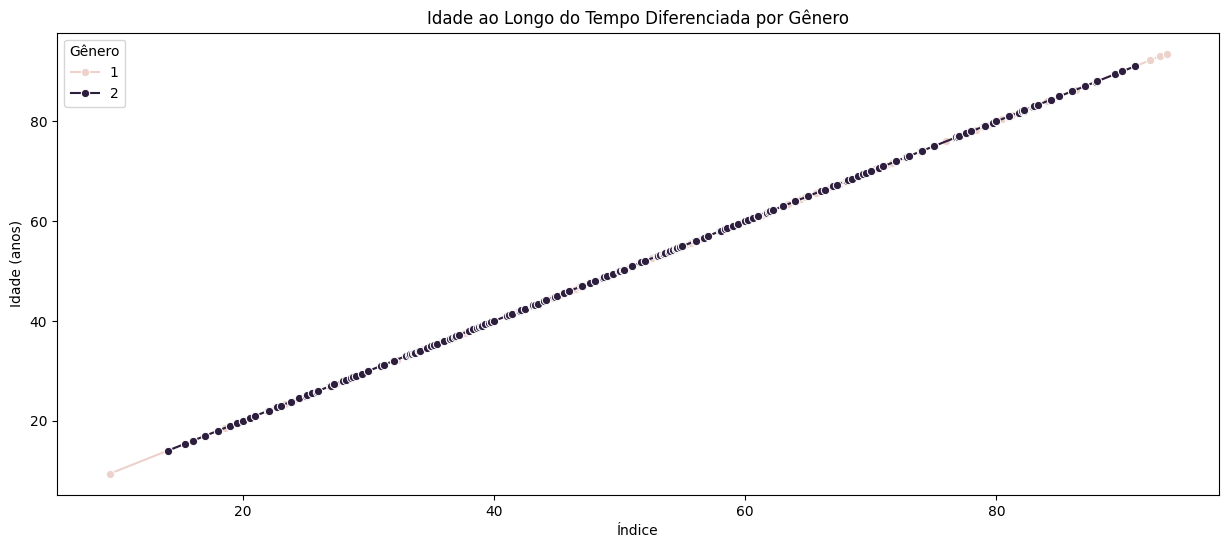

In [26]:

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Respostas_ao_formulario_CONGELA'
df = load_data(file_path, sheet_name)
#df=df.sort_values(by='IDADE_anos') #falar que isso nao deu diferença q por padrao ele ordena

plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x=df['IDADE_anos'], y='IDADE_anos', hue='GENERO', marker='o')
plt.title('Idade ao Longo do Tempo Diferenciada por Gênero')
plt.xlabel('Índice')
plt.ylabel('Idade (anos)')
plt.legend(title='Gênero')
plt.show()


In [38]:
#boxplot entre generos

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_Ricardo_CONGELADO.xlsx'
sheet_name = 'Respostas_ao_formulario_CONGELA'
df = load_data(file_path, sheet_name)

fig = px.box(df, x='GENERO', y='IDADE_anos', title='Boxplot de Idade entre Gêneros', 
             labels={'GENERO': 'Gênero', 'IDADE_anos': 'Idade em anos'})
fig.show()
fig.write_html("/home/lucasf/Desktop/Visualizacaodedados/grafico.html")


In [28]:
#separando as remessas

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Respostas_ao_formulario_CONGELA'
df = load_data(file_path, sheet_name)

remessa1=df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021']==1]
remessa2=df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021']==2]

In [29]:
#quantidade de individuos por remessa

quantidade_individual_remessa1 = len(remessa1)
quantidade_individual_remessa2 = len(remessa2)

# Criar um DataFrame com os dados
data = pd.DataFrame({
    'Remessa': ['Remessa 1', 'Remessa 2'],
    'Quantidade de Indivíduos': [quantidade_individual_remessa1, quantidade_individual_remessa2]
})


fig = px.bar(data, 
             x='Remessa', 
             y='Quantidade de Indivíduos', 
             title='Quantidade de Indivíduos por Remessa',
             labels={'Remessa': 'Remessa', 'Quantidade de Indivíduos': 'Quantidade de Indivíduos'},
             color='Remessa',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.write_html("/home/lucasf/Desktop/Visualizacaodedados/Ind_Por_remessa.html")

fig.show()


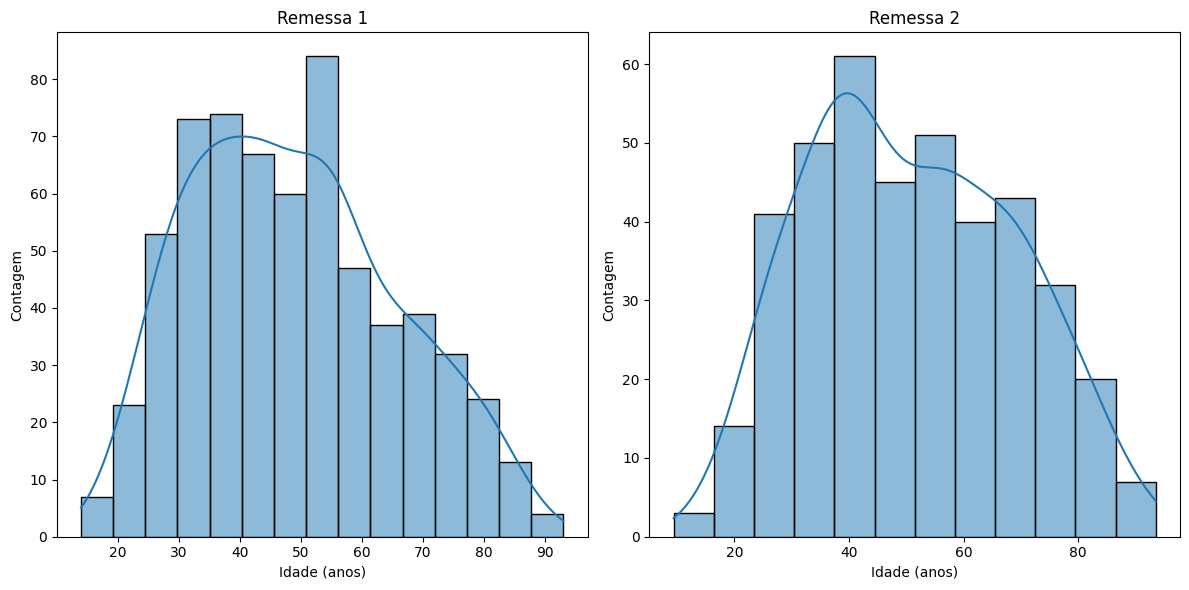

In [25]:
#distribuiçao da idade por remessa

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=remessa1, x='IDADE_anos', ax=axes[0], kde=True)
axes[0].set_title('Remessa 1')
axes[0].set_xlabel('Idade (anos)')
axes[0].set_ylabel('Contagem')

sns.histplot(data=remessa2, x='IDADE_anos', ax=axes[1], kde=True)
axes[1].set_title('Remessa 2')
axes[1].set_xlabel('Idade (anos)')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


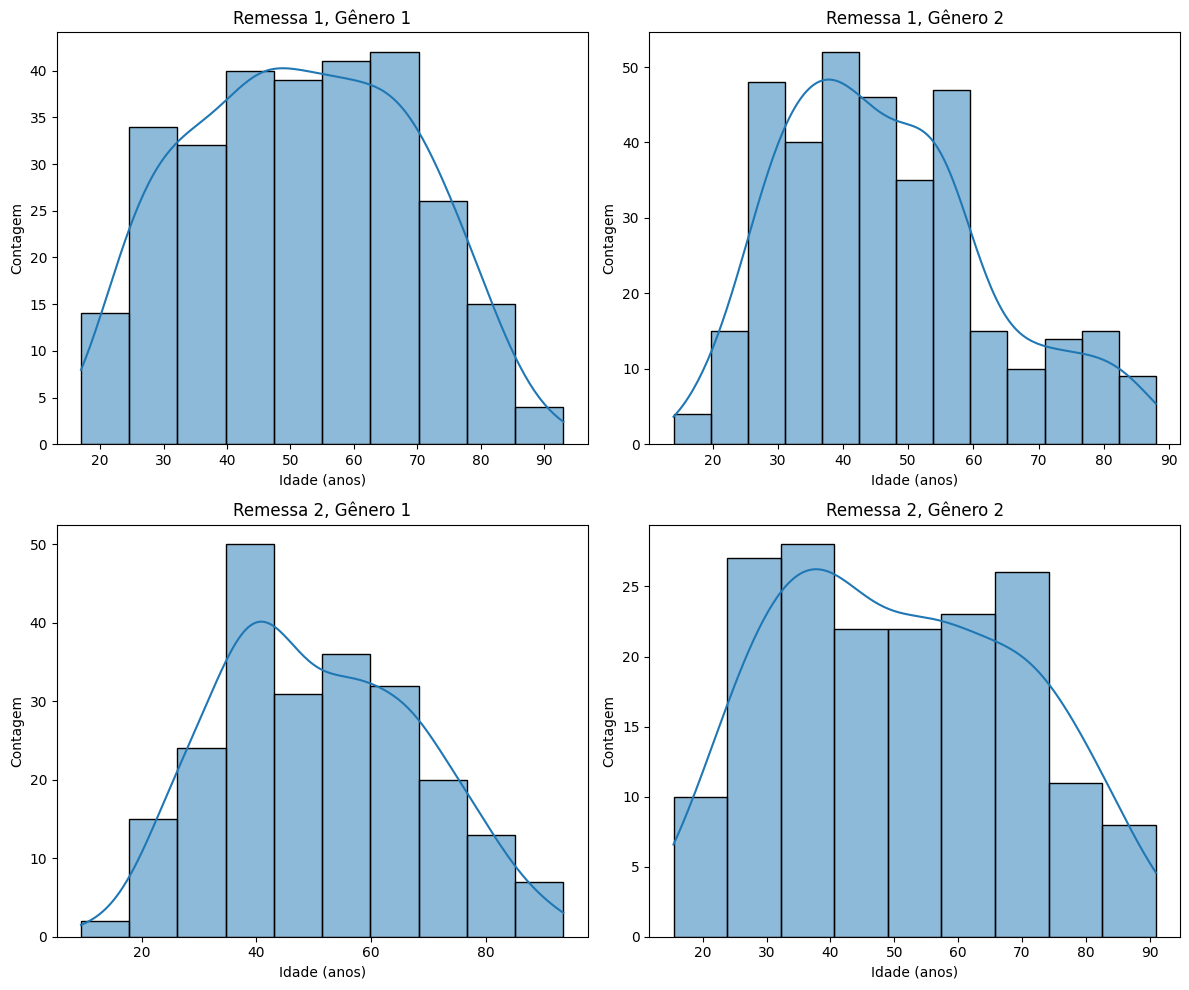

In [26]:
#distribuiçao da idade por remessa e sexo

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, remessa in enumerate([1, 2]):
    for j, genero in enumerate([1, 2]):
        dados_filtrados = df[(df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021'] == remessa) & (df['GENERO'] == genero)]
        sns.histplot(data=dados_filtrados, x='IDADE_anos', ax=axes[i, j], kde=True)
        axes[i, j].set_title(f'Remessa {remessa}, Gênero {genero}')
        axes[i, j].set_xlabel('Idade (anos)')
        axes[i, j].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


In [33]:
#distribuiçao de sexo por remessa

remessa1['Remessa'] = 'Remessa 1'
remessa2['Remessa'] = 'Remessa 2'
df_concatenado = pd.concat([remessa1, remessa2])
fig = px.histogram(df_concatenado, 
                   x='GENERO',color='Remessa',barmode='group',title='Distribuição dos Gêneros nas Remessas',labels={'GENERO': 'Gênero', 'count': 'Contagem'},color_discrete_sequence=px.colors.qualitative.Set2)

pio.write_html(fig, 'distribuicao_dos_generos_nas_remessas.html')
fig.show()

/tmp/ipykernel_95067/2766205266.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_95067/2766205266.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
#numero de individuos por estado e remessa

remessa1 = df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021'] == 1]
remessa2 = df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021'] == 2]


contagem_remessa1 = remessa1['UF_COLETA'].value_counts().sort_index()
contagem_remessa2 = remessa2['UF_COLETA'].value_counts().sort_index()

contagens = pd.DataFrame({
    'Estado': contagem_remessa1.index.union(contagem_remessa2.index),
    'Remessa 1': contagem_remessa1.reindex(contagem_remessa1.index.union(contagem_remessa2.index), fill_value=0).values,
    'Remessa 2': contagem_remessa2.reindex(contagem_remessa1.index.union(contagem_remessa2.index), fill_value=0).values
})

fig = px.bar(contagens.melt(id_vars='Estado', value_vars=['Remessa 1', 'Remessa 2']),
             x='Estado',
             y='value',
             color='variable',
             barmode='group',
             title='Comparação de indivíduos por estado entre Remessa 1 e Remessa 2',
             labels={'value': 'Número de indivíduos', 'variable': 'Remessa'})

pio.write_html(fig, 'distribuicao_dos_ind_por_estado_remessas.html')
fig.show()


In [8]:
#numero de individuos por remessa e nivel de infeccao

remessa1 = df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021'] == 1]
remessa2 = df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021'] == 2]

remessa1['Remessa'] = 'Remessa 1'
remessa2['Remessa'] = 'Remessa 2'

df_concatenado = pd.concat([remessa1, remessa2])

fig = px.histogram(df_concatenado, 
                   x='Classificacao_Covid', 
                   color='Remessa', 
                   barmode='group',
                   title='Comparação da Classificação de COVID entre Remessas',
                   labels={'Classificacao_Covid': 'Classificação de COVID', 'count': 'Quantidade de Indivíduos'},
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()


/tmp/ipykernel_91771/628296521.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_91771/628296521.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
#normalizando para ver as porcentagens

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)

remessa1=df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021']==1]
remessa2=df.loc[df['Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021']==2]

contagem1 = remessa1['Classificacao_Covid'].value_counts()
contagem2 = remessa2['Classificacao_Covid'].value_counts()

porcentagens1 = contagem1 * 100 / len(remessa1)
porcentagens2 = contagem2 * 100 / len(remessa2)

print(porcentagens1, porcentagens2)



Classificacao_Covid
2.0    42.295597
3.0    22.169811
5.0    16.666667
4.0    13.993711
1.0     4.874214
Name: count, dtype: float64 Classificacao_Covid
 2.0    36.117936
 5.0    26.044226
 4.0    18.918919
 3.0    14.250614
 1.0     4.422604
-1.0     0.245700
Name: count, dtype: float64


In [ ]:
def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)

sim=df.loc[df['TABAGISMO']==3]
nao=df.loc[df['TABAGISMO']==2]

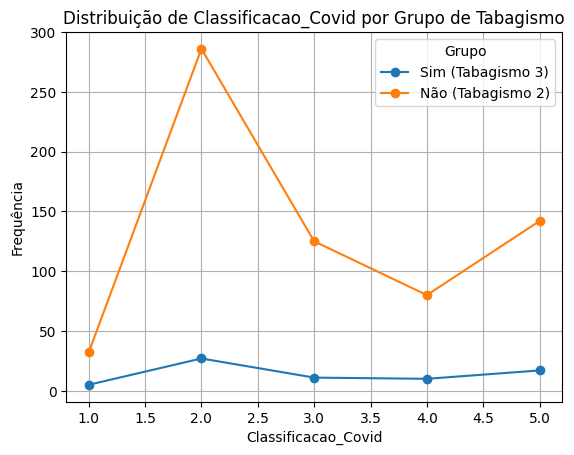

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para carregar dados
def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Carregar os dados
file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)

# Filtrar os dados
sim = df.loc[df['TABAGISMO'] == 3]
nao = df.loc[df['TABAGISMO'] == 2]

# Verificar se a coluna 'Classificacao_Covid' está presente
if 'Classificacao_Covid' not in df.columns:
    print("A coluna 'Classificacao_Covid' não está presente no dataframe.")
else:
    # Definir a faixa de valores para Classificacao_Covid
    classificacao_values = range(1, 6)

    # Contar a frequência de valores na coluna 'Classificacao_Covid' para cada grupo
    sim_counts = sim['Classificacao_Covid'].value_counts().reindex(classificacao_values, fill_value=0)
    nao_counts = nao['Classificacao_Covid'].value_counts().reindex(classificacao_values, fill_value=0)

    # Criar um DataFrame para os dados contados
    counts_df = pd.DataFrame({
        'Sim (Tabagismo 3)': sim_counts,
        'Não (Tabagismo 2)': nao_counts
    })

    # Plotar os dados
    counts_df.plot(kind='line', marker='o')
    plt.xlabel('Classificacao_Covid')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Classificacao_Covid por Grupo de Tabagismo')
    plt.legend(title='Grupo')
    plt.grid(True)
    plt.show()


In [5]:
sim = df.loc[df['TABAGISMO'] == 3]
sim.loc[df['Classificacao_Covid']==2]

,ID_genotipagem,Identificacao_amostra,Codigo_centro_coleta,Codigo_classes_de_coleta,Classificacao_Covid,Vacina_contra_Covid_antes_da_doenca,Onda_1_ate_nov2020_Onda_2_entre_nov_2020_e_dez2021,UF_COLETA,GENERO,IDADE_(anos),...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
24,121_fiocruz_placa_02_C01_MV.CEL,PSVG_121,52.0,5.0,2.0,0.0,1.0,MT,1.0,53.000000,...,0.0038,-0.0024,0.0007,-0.0059,-0.0026,0.0126,-0.0020,-0.0027,0.0025,0.0104
35,131_fiocruz_placa_02_C11_MV.CEL,PSVG_131,52.0,5.0,2.0,0.0,1.0,MT,2.0,36.000000,...,0.0050,-0.0074,0.0023,0.0055,0.0009,0.0064,-0.0013,0.0023,-0.0003,-0.0123
50,145_fiocruz_placa_02_E01_MV.CEL,PSVG_145,52.0,5.0,2.0,0.0,1.0,MT,2.0,66.000000,...,0.0000,0.0025,0.0048,0.0001,-0.0154,-0.0016,-0.0077,-0.0020,0.0010,0.0026
298,230_fiocruz_placa_03_D02_MV.CEL,PSGHC_133,66.0,1.0,2.0,0.0,1.0,RS,2.0,39.296372,...,0.0056,-0.0015,0.0010,-0.0009,-0.0081,-0.0023,-0.0009,-0.0006,0.0058,-0.0021
299,231_fiocruz_placa_03_D03_MV.CEL,PSGHC_134,66.0,1.0,2.0,0.0,1.0,RS,2.0,61.000000,...,0.0046,-0.0004,0.0028,0.0013,-0.0045,0.0023,0.0010,-0.0012,0.0029,0.0064
336,265_fiocruz_placa_03_G01_MV.CEL,202001952,63.0,1.0,2.0,0.0,1.0,RJ,1.0,29.000000,...,-0.0031,0.0008,0.0006,-0.0035,-0.0045,0.0023,-0.0015,-0.0006,-0.0024,-0.0005
353,280_fiocruz_placa_03_H04_MV.CEL,202003332,63.0,1.0,2.0,0.0,1.0,RJ,2.0,47.000000,...,0.0131,0.0003,-0.0051,-0.0048,-0.0055,0.0104,-0.0040,-0.0036,0.0001,0.0039
379,303_fiocruz_placa_04_B03_MV.CEL,202001999,63.0,1.0,2.0,0.0,1.0,RJ,1.0,31.000000,...,0.0079,0.0026,-0.0036,0.0011,-0.0046,-0.0056,0.0026,0.0003,-0.0039,-0.0097
388,312_fiocruz_placa_04_B12_MV.CEL,202012009,63.0,1.0,2.0,0.0,1.0,RJ,1.0,61.000000,...,-0.0014,0.0004,0.0020,-0.0020,0.0037,-0.0058,-0.0072,0.0081,0.0002,0.0002
450,370_fiocruz_placa_04_G10_MV.CEL,221_AVB,64.0,5.0,2.0,0.0,1.0,RJ,2.0,46.000000,...,0.0026,-0.0053,-0.0056,-0.0079,-0.0043,-0.0075,0.0006,-0.0059,0.0040,0.0034


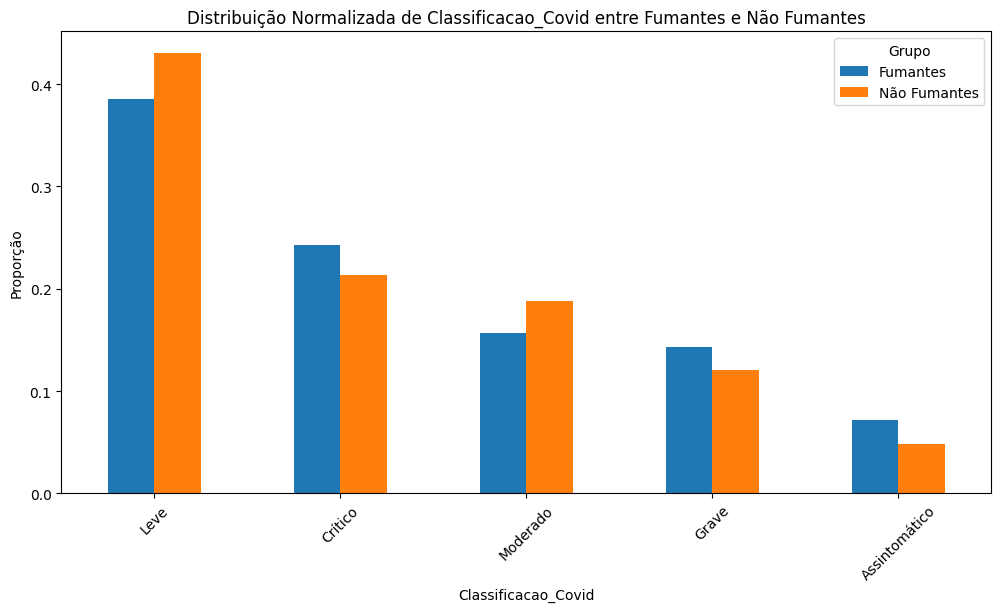

<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)

# Filtrando fumantes e não fumantes
fumantes = df.loc[df['TABAGISMO'] == 3]
fumantes = fumantes.sort_values(by='Classificacao_Covid', ascending=True)

nao_fumantes = df.loc[df['TABAGISMO'] == 2]
nao_fumantes = nao_fumantes.sort_values(by='Classificacao_Covid', ascending=True)

# Calculando a distribuição de Classificacao_Covid
fumantes_dist = fumantes['Classificacao_Covid'].value_counts(normalize=True)
nao_fumantes_dist = nao_fumantes['Classificacao_Covid'].value_counts(normalize=True)

# Criando um DataFrame para visualização
dist_df = pd.DataFrame({
    'Fumantes': fumantes_dist,
    'Não Fumantes': nao_fumantes_dist
}).fillna(0)  # Preencher NaN com 0

# Mapeamento das classificações para descrições
classificacao_labels = {
    1.0: 'Assintomático',
    2.0: 'Leve',
    3.0: 'Moderado',
    4.0: 'Grave',
    5.0: 'Crítico'
}

# Plotando os gráficos de barras normalizados
ax = dist_df.plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição Normalizada de Classificacao_Covid entre Fumantes e Não Fumantes')
plt.xlabel('Classificacao_Covid')
plt.ylabel('Proporção')

# Ajustando os rótulos do eixo X
ax.set_xticklabels([classificacao_labels.get(float(label), label) for label in dist_df.index])

plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.show()

# Salvando o gráfico
plt.savefig('/home/lucasf/Desktop/Visualizacaodedados/fumantes_vs_nivel_infeccao')


In [16]:
import pandas as pd
import plotly.graph_objects as go

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)

fumantes = df.loc[df['TABAGISMO'] == 3]
fumantes = fumantes.sort_values(by='Classificacao_Covid', ascending=True)

nao_fumantes = df.loc[df['TABAGISMO'] == 2]
nao_fumantes = nao_fumantes.sort_values(by='Classificacao_Covid', ascending=True)


fumantes_dist = fumantes['Classificacao_Covid'].value_counts(normalize=True)
nao_fumantes_dist = nao_fumantes['Classificacao_Covid'].value_counts(normalize=True)


dist_df = pd.DataFrame({
    'Fumantes': fumantes_dist,
    'Não Fumantes': nao_fumantes_dist
}).fillna(0)  # Preencher NaN com 0


classificacao_labels = {
    1.0: 'Assintomático',
    2.0: 'Leve',
    3.0: 'Moderado',
    4.0: 'Grave',
    5.0: 'Crítico'
}

dist_df = dist_df.reindex([1.0, 2.0, 3.0, 4.0, 5.0])


fig = go.Figure()


fig.add_trace(go.Scatter(
    x=[classificacao_labels[label] for label in dist_df.index],
    y=dist_df['Fumantes'],
    mode='lines+markers',
    name='Fumantes',
    line=dict(color='red')
))


fig.add_trace(go.Scatter(
    x=[classificacao_labels[label] for label in dist_df.index],
    y=dist_df['Não Fumantes'],
    mode='lines+markers',
    name='Não Fumantes',
    line=dict(color='blue')
))


fig.update_layout(
    title='Distribuição Normalizada de Classificacao_Covid entre Fumantes e Não Fumantes',
    xaxis_title='Classificacao_Covid',
    yaxis_title='Proporção',
    xaxis=dict(
        tickmode='array',
        tickvals=[classificacao_labels[label] for label in dist_df.index],
        ticktext=[classificacao_labels[label] for label in dist_df.index]
    ),
    legend_title='Grupo'
)


fig.write_html('/home/lucasf/Desktop/Visualizacaodedados/fumantes_vs_nivel_infeccao_interativo.html')


fig.show()


In [33]:
import pandas as pd
import plotly.graph_objects as go

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)

curado = df.loc[df['EVOLUCAO/_DESFECHO'] == 2]
fumantes = fumantes.sort_values(by='MEDICACAO_CRONICA', ascending=True)

falecimento = df.loc[df['EVOLUCAO/_DESFECHO'] == 4]
nao_fumantes = nao_fumantes.sort_values(by='MEDICACAO_CRONICA', ascending=True)

fumantes_dist = fumantes['MEDICACAO_CRONICA'].value_counts(normalize=True)
nao_fumantes_dist = nao_fumantes['MEDICACAO_CRONICA'].value_counts(normalize=True)



MEDICACAO_CRONICA
 1.0    0.426492
 2.0    0.314410
-1.0    0.259098
Name: proportion, dtype: float64

In [37]:
import pandas as pd
import plotly.graph_objects as go

def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

file_path = '/home/lucasf/Desktop/Visualizacaodedados/Casoxcontrole_onda-GWAS_Fenotipos_e_covariaveis_revisado_CONGELADO.xlsx'
sheet_name = 'Completa'
df = load_data(file_path, sheet_name)
df = df.fillna(-1)


curado = df.loc[df['EVOLUCAO/_DESFECHO'] == 2]
falecimento = df.loc[df['EVOLUCAO/_DESFECHO'] == 4]


value_map = {-1: 'Nao_informado', 1: 'Nao_faz_uso_de_medicacao', 2: 'Faz_uso_de_medicacao'}
curado['MEDICACAO_CRONICA'] = curado['MEDICACAO_CRONICA'].map(value_map)
falecimento['MEDICACAO_CRONICA'] = falecimento['MEDICACAO_CRONICA'].map(value_map)

curado_dist = curado['MEDICACAO_CRONICA'].value_counts(normalize=True).sort_index()
falecimento_dist = falecimento['MEDICACAO_CRONICA'].value_counts(normalize=True).sort_index()
fig = go.Figure()

fig.add_trace(go.Scatter(x=curado_dist.index, y=curado_dist.values,
                    mode='lines+markers',
                    name='Curado'))

fig.add_trace(go.Scatter(x=falecimento_dist.index, y=falecimento_dist.values,
                    mode='lines+markers',
                    name='Falecimento'))
fig.update_layout(title='Distribuição de MEDICACAO_CRONICA entre Curados e Falecidos',
                   xaxis_title='MEDICACAO_CRONICA',
                   yaxis_title='Proporção',
                   legend=dict(x=0, y=1, traceorder='normal'))
fig.show()
fig.write_html('/home/lucasf/Desktop/Visualizacaodedados/medicacao.html')


/tmp/ipykernel_335868/621347050.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_335868/621347050.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

